<a href="https://colab.research.google.com/github/ColletLisa/ColletLisa/blob/main/Hypothesis_testing_for_Autolib_Electric_Car_Sharing_Service_Company1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Defining the Question**

### **Specifying the Question**

From the dataset provided for the Autolib electric car-sharing service company, does the average number of blue cars taken affect the average number of charging slots taken?

**Response Variable**: Slots_taken_sum

**Explanatory Variable**: BlueCars_taken_sum

> **Null Hypothesis**: An increase in the average number of blue cars taken increases the average number of charging slots taken.

> **Alternative Hypothesis**: There is no correlation between the average number of bluecars taken and the average number of charging slots taken. (Claim)

### **Defining the Metric for Success**

> The project will be considered successful when we shall be able to establish the correlation between the average number of blue cars taken and the average number of charging slots taken.

### **Understanding the context**

> Autolib electric car-sharing service company was an electric car sharing service located in Paris.The Autolib' service maintained a fleet of all-electric Bolloré Bluecars for public use on a paid subscription basis with a citywide network of parking and charging stations. As Data Scientists, we have been tasked to understand the electric car usage for the Autolib electric car-sharing service company by investigating a claim that there is no correlation between the average number of bluecars taken and the average number of charging slots taken. In an effort to do this, we shall identify some areas and periods of interest and then perform hypothesis testing with regards to our claim.

### **Reaserch Objectives**

* To establish the correlation between bluecars taken and number of charging slots taken
* To compare and contrast the number of bluecars taken in two different areas
* To compare and contrast the charging slots in two different areas
* To establish which day of the weekend bluecars are taken more in the two areas
* To establish whether more charging slots should be added based on the findings


### **Recording the Experimental Design**

* Defining the research question
* Load data and preview preliminary characteristics of the dataset
* Finding and dealing with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.
* Challenge the solution 
* Follow up questions



### **Relevance of the data**

> The dataset contains daily activities carried out on the Autolib electric car sharing company from January to July 2018 in different area codes. The data used in this survey was obtained from an open datasource and the information contained in our dataset is relevant for our analysis. 

## **2. Reading the data**

In [ ]:
# Loading our data from the source
import pandas as pd

url = 'https://bit.ly/DSCoreAutolibDataset'
autolib = pd.read_csv(url)
autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## **3. Checking our Data**

> This is important for us to understand our dataset.

In [ ]:
# Determining the number of rows and columns (records) in our dataset
autolib.shape

(16085, 13)

**Observations**

> From the output, our dataset has 16085 rows and 13 columns.

In [ ]:
# Checking our columns
list(autolib.columns)

['Postal code',
 'date',
 'n_daily_data_points',
 'dayOfWeek',
 'day_type',
 'BlueCars_taken_sum',
 'BlueCars_returned_sum',
 'Utilib_taken_sum',
 'Utilib_returned_sum',
 'Utilib_14_taken_sum',
 'Utilib_14_returned_sum',
 'Slots_freed_sum',
 'Slots_taken_sum']

**Explanation**
> The column, Postal code shows the postal code of an area in the city, dayofweek indicates the days of the week with 0=Monday, 1=Tuesday, 2-Wednesday, 3-Thursday, 4-Friday, 5-Saturday and 6-Sunday and day_type shows whether the day was a weekday or weekend.

In [ ]:
#Previewing the top of our dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking the general information about our DataFrame
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


**Observations**
> Our dataset does not have any null values and each column has an appropriate datatype


## **4. External Data Source Validation**

> The data that we have is from a trusted source and it therefore does not require data source validation.

## **5. Data Cleaning**

### Renaming the Columns

In [ ]:
# Renaming the columns
columns = autolib.columns.tolist()
for name in range(len(columns)):
  columns[name] = columns[name].lower().replace(" ", "_")

autolib.columns = columns
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

### Checking for duplicates

In [ ]:
# Checking if we have duplicates in the dataset
autolib.duplicated().any()

False

### Checking missing values

In [ ]:
# Checking if our dataset has missing values
print(autolib.isnull().any())

postal_code               False
date                      False
n_daily_data_points       False
dayofweek                 False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool


**Observations**
> Our dataset does not have any duplicated or missing values.

### Checking for Outliers

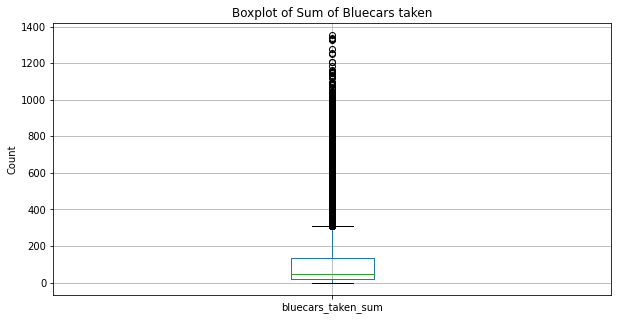

In [ ]:
# Checking for Outliers in the bluecars_taken_sum variable
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,5))
autolib.boxplot(['bluecars_taken_sum'], showmeans = False)
plt.ylabel('Count')
plt.title('Boxplot of Sum of Bluecars taken')
plt.show()

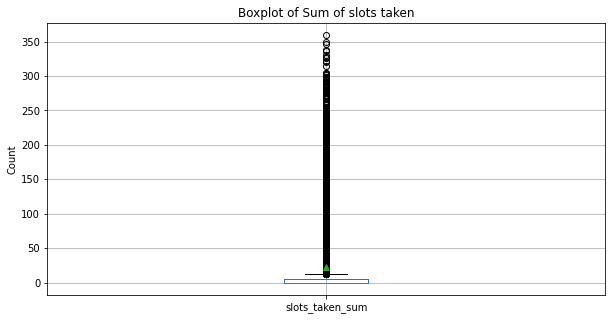

In [ ]:
# Checking for Outliers in the slots_taken_sum variable
fig = plt.figure(figsize=(10,5))
autolib.boxplot(['slots_taken_sum'], showmeans = True)
# showmeans=True argument adds a mark for mean value.
plt.ylabel('Count')
plt.title('Boxplot of Sum of slots taken')
plt.show()

**Observations**
> The two boxplots show the data has some outliers. We will go ahead and check how many records of outliers we have and decide whether to remove them or use the data as is.

In [ ]:
# Checking the position of the Outlier
print(np.where(autolib['bluecars_taken_sum']>300))
print(np.where(autolib['slots_taken_sum']>50))

(array([ 317,  324,  325, ..., 5137, 5141, 5142]),)
(array([ 214,  227,  249, ..., 3116, 3117, 3118]),)


In [ ]:
# Checking the interquatile ranges
Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR = Q3 - Q1
IQR

postal_code               2070.0
n_daily_data_points          1.0
dayofweek                    4.0
bluecars_taken_sum         115.0
bluecars_returned_sum      115.0
utilib_taken_sum             4.0
utilib_returned_sum          4.0
utilib_14_taken_sum          9.0
utilib_14_returned_sum       9.0
slots_freed_sum              5.0
slots_taken_sum              5.0
dtype: float64

In [ ]:
# Removing outliers based on the IQR range
autolib_df = autolib[~((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(autolib_df.shape)

# Printing the shape of our old dataset
print(autolib.shape)

# Number of rows removed
rows_removed = autolib.shape[0] - autolib_df.shape[0]
rows_removed

# Percentage of rows removed
row_percent = (rows_removed/autolib.shape[0]) * 100
row_percent

(9783, 13)
(16085, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


39.17935965184955

**Observations**
> From the output, the total percentage of records that are not within the interquartile range is 39%. This is a high number to be removed from the data. This means that the outliers are likely to be part of the important information in our dataset and we will therefore not remove them. The data will be used as is.

### Checking distictive values

In [ ]:
# Looking for unique values
autolib.nunique() 

postal_code               104
date                      156
n_daily_data_points        23
dayofweek                   7
day_type                    2
bluecars_taken_sum        932
bluecars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
dtype: int64

### Dropping unnecessary columns

In [ ]:
# We will first copy our data frame then perform the changes on the copied df
# We will assign our copied dataframe the variable autolib_df

autolib_df = autolib.copy()
autolib_df

autolib_df.drop(columns = ['n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], 
                 axis=1, inplace=True)
autolib_df


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,22,20
1,75001,1/2/2018,1,weekday,98,94,23,22
2,75001,1/3/2018,2,weekday,138,139,27,27
3,75001,1/4/2018,3,weekday,104,104,25,21
4,75001,1/5/2018,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,4,weekday,15,10,0,0
16081,95880,6/16/2018,5,weekend,19,19,0,0
16082,95880,6/17/2018,6,weekend,33,35,0,0
16083,95880,6/18/2018,0,weekday,11,14,0,0


**Observations**
> We copied our dataset in order to maintain the original dataset as is and make changes on the copied df. From the output, the columns that may not be useful in our investigation have been dropped. 

## **6. Exploratory Analysis**

> The investigation of our null hypothesis requires us to use either weekdays or weekends as the selected periods of interest but not a mixture of both. We chose to work with weekends. We will also work with some areas of interest which will be postal code 75016 and postal code 75017.

### a) Extracting the day type

In [ ]:
# Extracting the data for weekend in postal code areas 75016 and 75017
# We will assign it the variable autolib_df1.

autolib_df1 = autolib_df.loc[(autolib_df['postal_code'].isin([75016, 75017])) & (autolib_df['day_type'] == 'weekend')]
autolib_df1

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2345,75016,1/6/2018,5,weekend,847,868,199,206
2346,75016,1/7/2018,6,weekend,842,851,178,174
2352,75016,1/13/2018,5,weekend,985,973,278,278
2353,75016,1/14/2018,6,weekend,918,940,274,268
2359,75016,1/20/2018,5,weekend,1062,1077,249,252
...,...,...,...,...,...,...,...,...
2635,75017,6/3/2018,6,weekend,857,897,226,229
2641,75017,6/9/2018,5,weekend,923,949,296,304
2642,75017,6/10/2018,6,weekend,829,883,223,230
2648,75017,6/16/2018,5,weekend,859,891,222,231


In [ ]:
# Extracting the data for postal code of 75016 which we'll assign the variable area1
area1 = autolib_df1[autolib_df1.postal_code == 75016]
area1.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2345,75016,1/6/2018,5,weekend,847,868,199,206
2346,75016,1/7/2018,6,weekend,842,851,178,174
2352,75016,1/13/2018,5,weekend,985,973,278,278
2353,75016,1/14/2018,6,weekend,918,940,274,268
2359,75016,1/20/2018,5,weekend,1062,1077,249,252


In [ ]:
# Extracting the postal code of 75017 which we'll assign the variable area2
area2 = autolib_df1[autolib_df1.postal_code == 75017]
area2.head(5)

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2501,75017,1/6/2018,5,weekend,928,904,223,219
2502,75017,1/7/2018,6,weekend,795,846,200,206
2508,75017,1/13/2018,5,weekend,992,987,245,245
2509,75017,1/14/2018,6,weekend,890,963,203,215
2515,75017,1/20/2018,5,weekend,945,939,253,255


In [ ]:
# Getting the rows and the columns for the two areas
print(area1.shape)
print(area2.shape)

(44, 8)
(44, 8)


**Observations**
> The output shows that the rows in both area codes are 44 and the columns are 8 on weekends. This means that the records in the two area codes are the same.

### b) Univariate Analysis

#### Descriptive statistics

In [ ]:
#Checking the summary for the descriptive statistics of blue cars taken and slots taken in autolib_df1

autolib_df1[['bluecars_taken_sum', 'slots_taken_sum']].describe()

,bluecars_taken_sum,slots_taken_sum
count,88.000000,88.000000
mean,858.670455,218.806818
std,167.781585,46.110776
min,49.000000,7.000000
25%,801.750000,204.500000
50%,870.000000,224.000000
75%,974.750000,242.750000
max,1088.000000,304.000000


**Observations**

> The output of this summary shows the total number of rows, the mean value, the standard deviation of the data, the min and max values of the data, the 25th, 50th and 75th percentile of the data per column.

In [ ]:
# Checking for the Skewness and Kurtosis of Blue Cars taken
print(autolib_df1['bluecars_taken_sum'].skew())
print(autolib_df1['slots_taken_sum'].kurt())

-2.725887345045874
8.373937131474952


**Observations**
> The negative value for the skewness indicate that the distribution is skewed to the right, meaning that the right tail is longer compared to the left tail.

> The positive kurtosis indicates a "heavy-tailed" distribution or outliers.

> Rate of change

In [ ]:
# Checking the total number of Saturdays and Sundays(Weekends) that we have
# since dayofweek is a categorical data, we'll use a frequency distribution table

autolib_df1.dayofweek.value_counts()

5    44
6    44
Name: dayofweek, dtype: int64

**Observations**
> The output shows that a total of 44 days in our dataset are Saturdays and 44 days are Sundays.

#### Visualization

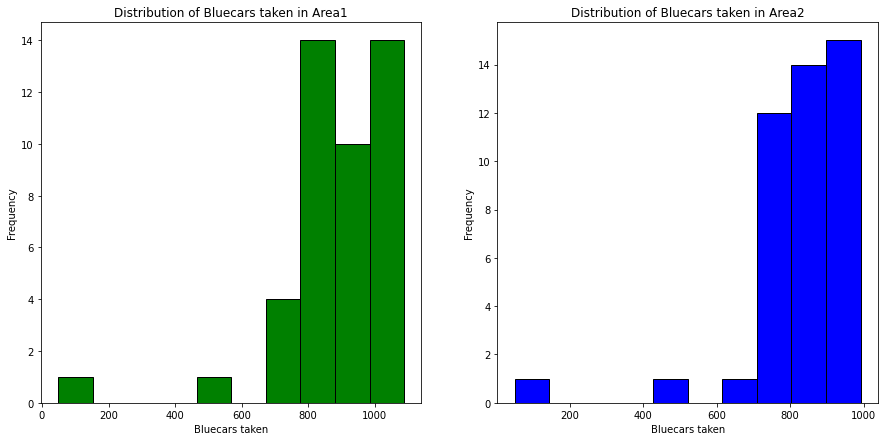

In [ ]:
# We will compare the number of blue cars taken in area1 and area 2 using a histogram 
# plotting a histogram for bluecars in area1 and bluecars taken in area2 on weekends
#
fig,ax=plt.subplots(1,2,figsize=(15,7))
area1['bluecars_taken_sum'].plot.hist(ax=ax[0], bins=10, color='green', edgecolor='black')
ax[0].set_title('Distribution of Bluecars taken in Area1')
ax[0].set_xlabel('Bluecars taken')
area2['bluecars_taken_sum'].plot.hist(ax=ax[1],bins=10, color='blue', edgecolor='black')
ax[1].set_title('Distribution of Bluecars taken in Area2')
ax[1].set_xlabel('Bluecars taken')
plt.show()

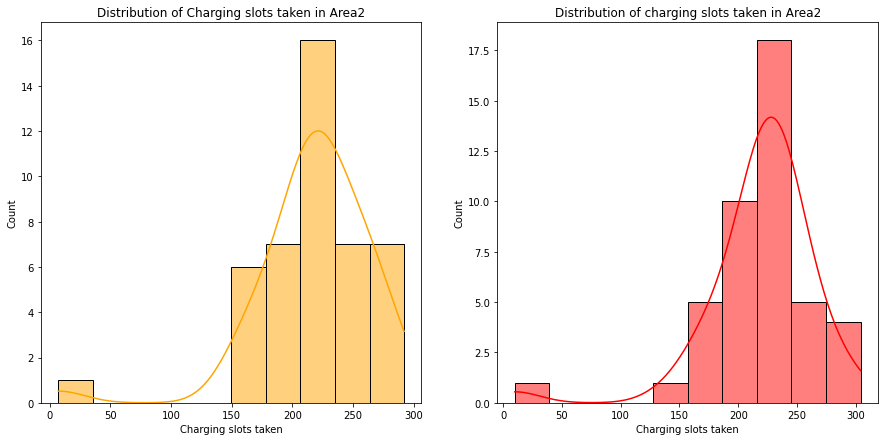

In [ ]:
# plotting a density curve showing the distribution of charging slots taken in area1 and charging slots taken in area2
#
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(area1['slots_taken_sum'], ax=ax[0], bins=10, color = 'orange', kde=True)
ax[0].set_title('Distribution of Charging slots taken in Area2')
ax[0].set_xlabel('Charging slots taken')
sns.histplot(area2['slots_taken_sum'], ax=ax[1], bins=10, color = 'red', kde=True)
ax[1].set_title('Distribution of charging slots taken in Area2')
ax[1].set_xlabel('Charging slots taken')
plt.show()

**Observations**
> The output of the histograms and the density curves for the two areas shows that the distributions of bluecars taken and charging slots taken are not symmetrical. They are both negatively skewed. This therefore means that more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.

### c) Bivariate Analysis

#### Line graphs

> The data for bluecars and charging slots taken was collected on different days of the week. We would like to see the number bluecars and charging slots taken over a period of time from January to June 2018. We will also look at the rate of change in the number of calls taken in the two areas.

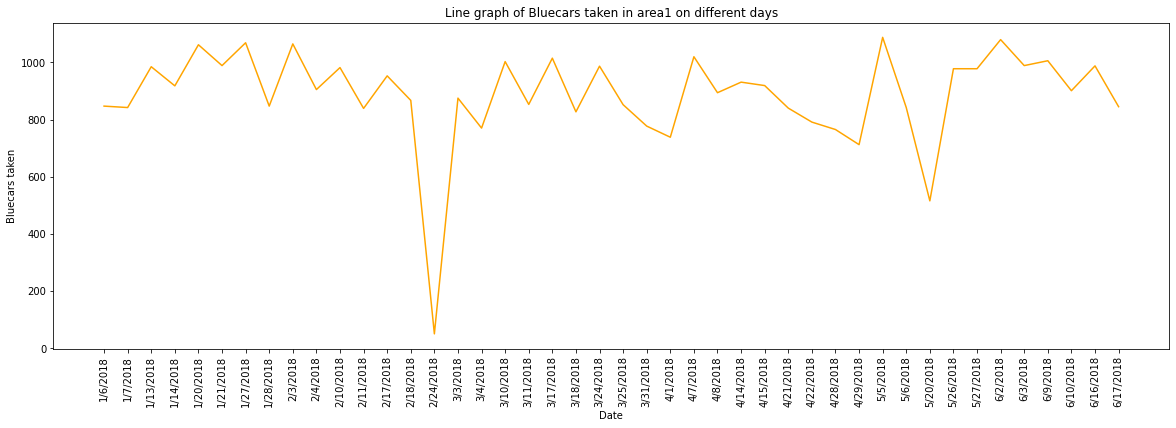

In [ ]:
# We will plot a line graph showing the number of blue cars taken in area1 on weekends 
#
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
# Extracting and assigning a variable to the date column
date = area1['date']
# Extracting and assigning a variable to the bluecars_taken_sum column
Bluecars_taken = area1['bluecars_taken_sum']
plt.plot(date, Bluecars_taken, color='orange')
plt.xlabel('Date')
plt.ylabel('Bluecars taken')
plt.title('Line graph of Bluecars taken in area1 on different days')
plt.show()

**Observations**
> We can see that the highest number of bluecars taken was on 5th May 2018 and the lowest number of bluecars taken was on 24th February 2018 in area1. We also note that there was a big dive number of bluecars taken on 24th February.

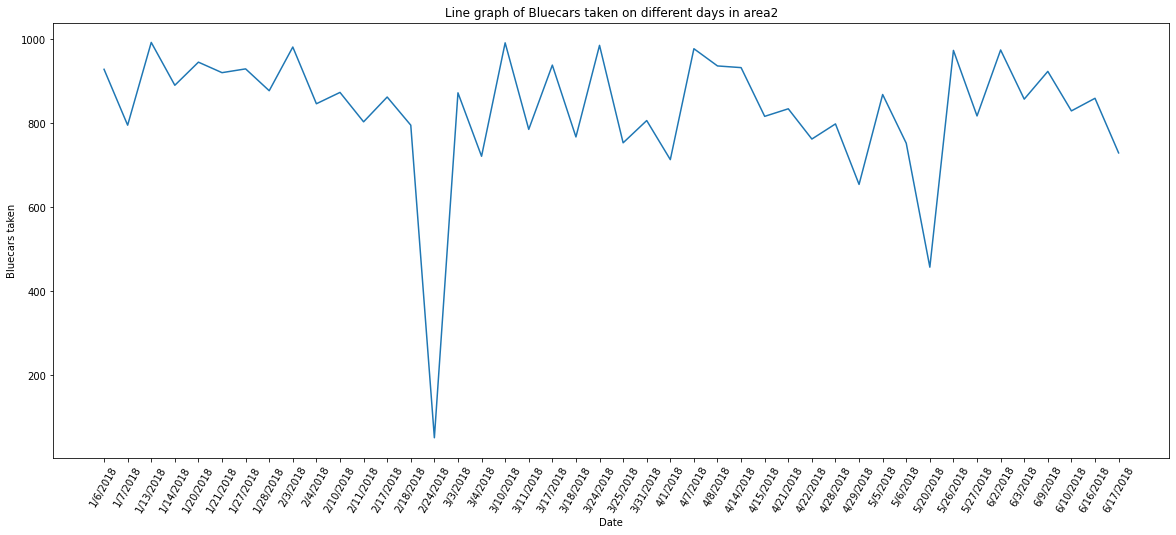

In [ ]:
# Ploting a line graph showing the number of blue cars taken in area2 on weekends 
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=60)
# Extracting the date column using .loc function
area2.loc[:,'date']
# Extracting the bluecars_taken_sum column using .loc function
area2.loc[:, 'bluecars_taken_sum']
plt.plot(area2.loc[:,'date'], area2.loc[:, 'bluecars_taken_sum'])
plt.xlabel('Date')
plt.ylabel('Bluecars taken')
plt.title('Line graph of Bluecars taken on different days in area2')
plt.show()

**Observations**
> We can see that the highest number of bluecars taken was on 13th January 2018 and the lowest number of bluecars taken was on 24th February 2018 in area2. We also note that there was a big dive number of bluecars taken on 24th February.

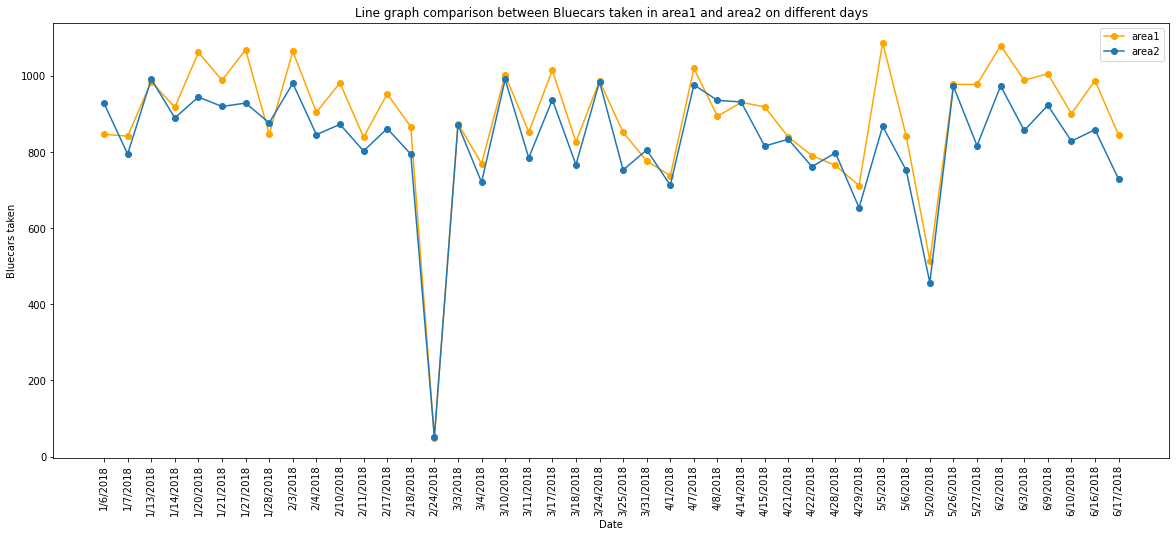

In [ ]:
# Ploting a line graph comparison between bluecars taken in area1 and bluecars taken in area2
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.plot(date, Bluecars_taken, color='orange', marker = 'o', label = 'area1')
plt.plot(area2.loc[:,'date'], area2.loc[:, 'bluecars_taken_sum'], marker = 'o', label = 'area2')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bluecars taken')
plt.title('Line graph comparison between Bluecars taken in area1 and area2 on different days')
plt.show()

**Observations**
> We can see that the trend of the number of bluecars taken on the weekends in the two areas is almost the same.

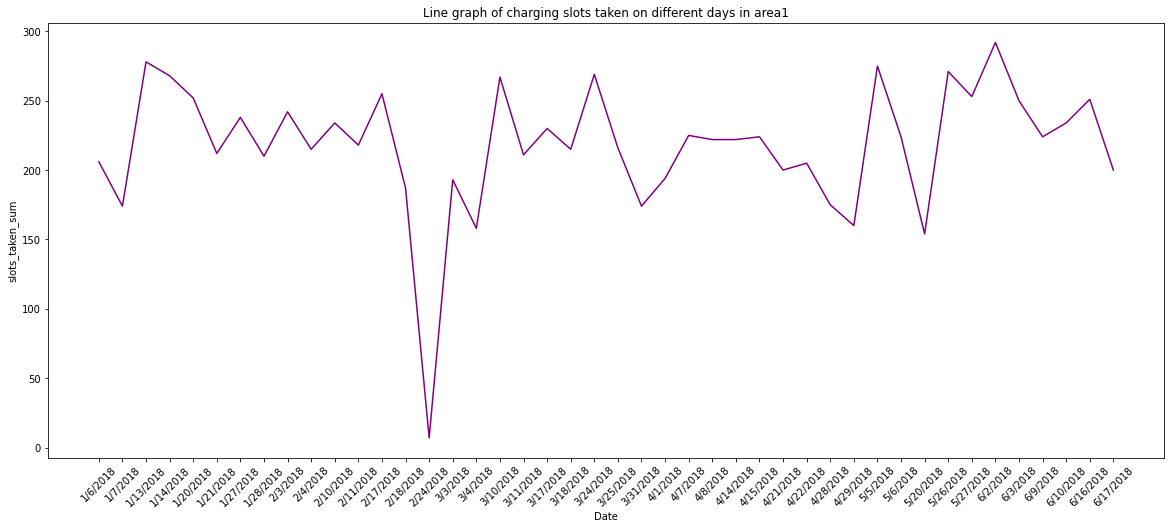

In [ ]:
# Ploting a line graph showing the number of charging slots taken in area1 on weekends 
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
date1 = area1['date']
Charging_slots1 = area1['slots_taken_sum']
plt.plot(date1, Charging_slots1, color='purple')
plt.xlabel('Date')
plt.ylabel('slots_taken_sum')
plt.title('Line graph of charging slots taken on different days in area1')
plt.show()

**Observations**
> We can see that the highest number of charging slots taken in area1 was on 2nd June 2018 and the lowest number of charging slots taken was on 24th February 2018. There was a big dive in the number of charging slots taken on 24th February as well.

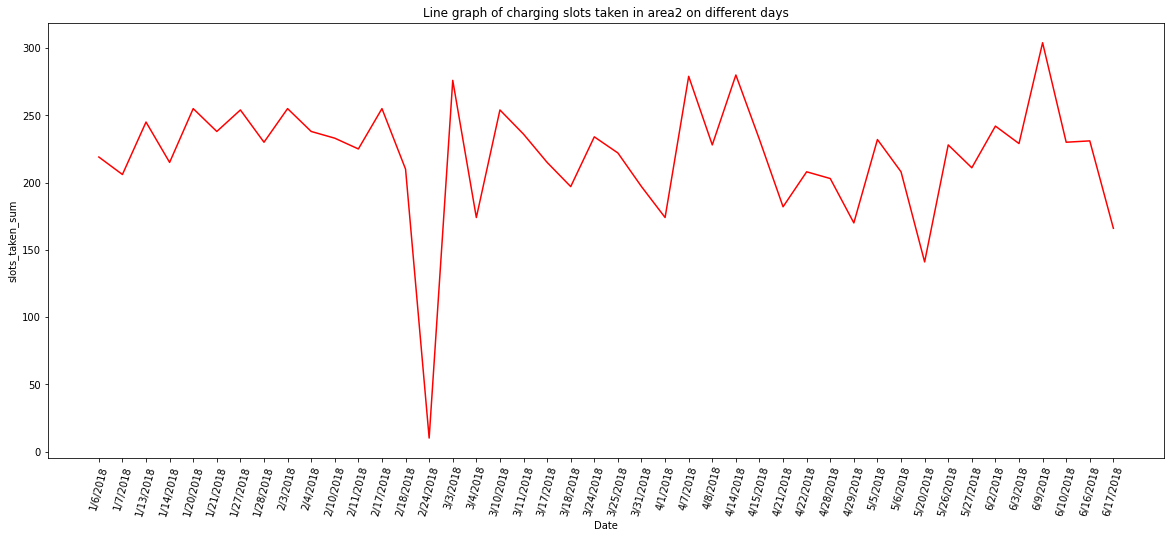

In [ ]:
# Ploting a line graph showing the number of charging slots taken in area2 on weekends 
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
date2 = area2['date']
Charging_slots2 = area2['slots_taken_sum']
plt.plot(date2, Charging_slots2, color='red')
plt.xlabel('Date')
plt.ylabel('slots_taken_sum')
plt.title('Line graph of charging slots taken in area2 on different days')
plt.show()

**Observations**
> We can see that the highest number of charging slots taken in area2 was on 9th June 2018 and the lowest number of charging slots taken was on 24th February 2018. A big dive in the number of charging slots taken on 24th February was also noted.

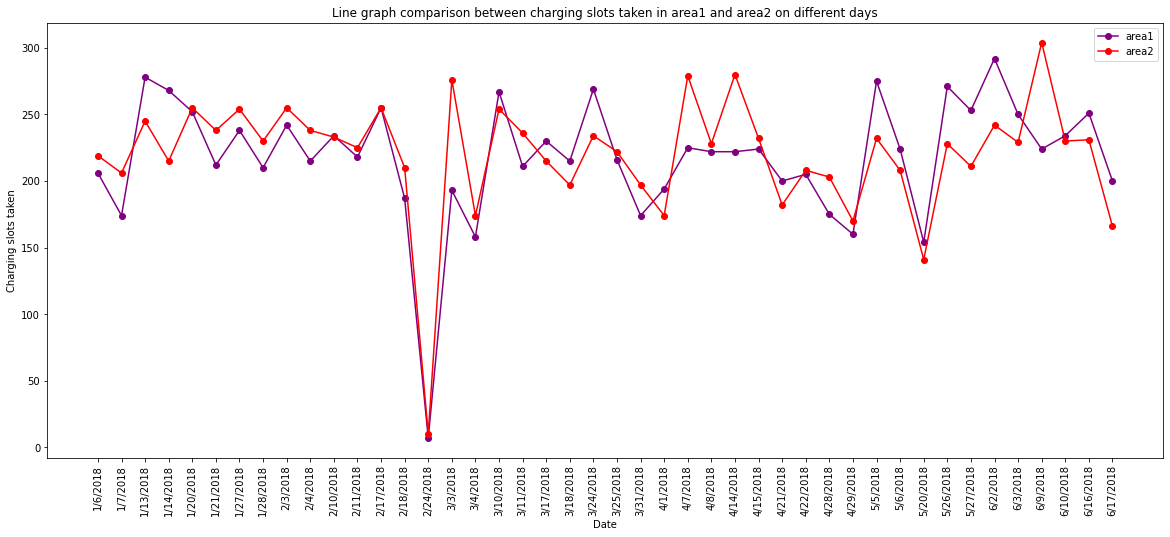

In [ ]:
# Ploting a line graph comparison between charging slots taken in area1 and charging slots taken in area2
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.plot(date1, Charging_slots1, color='purple', marker = 'o', label = 'area1')
plt.plot(date2, Charging_slots2, color='red', marker = 'o', label = 'area2')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Charging slots taken')
plt.title('Line graph comparison between charging slots taken in area1 and area2 on different days')
plt.show()

**Observations**
> We can see that the trend of the number of charging slots taken on the weekends in the two areas is almost the same.

**Rate of change**

> We could also look at the rate of change of blue cars taken in the two areas over time

In [ ]:
# Rate of change of number of bluecars taken and charging slots taken in area1
#
a = area1[['bluecars_taken_sum', 'slots_taken_sum']]
area1_rate = a.pct_change()
area1_rate.head()

,bluecars_taken_sum,slots_taken_sum
2345,NaN,NaN
2346,-0.005903,-0.155340
2352,0.169834,0.597701
2353,-0.068020,-0.035971
2359,0.156863,-0.059701


In [ ]:
# Rate of change of number of bluecars taken and charging slots taken in area2
b = area2[['bluecars_taken_sum', 'slots_taken_sum']]
area2_rate = b.pct_change()
area2_rate.head()

,bluecars_taken_sum,slots_taken_sum
2501,NaN,NaN
2502,-0.143319,-0.059361
2508,0.247799,0.189320
2509,-0.102823,-0.122449
2515,0.061798,0.186047


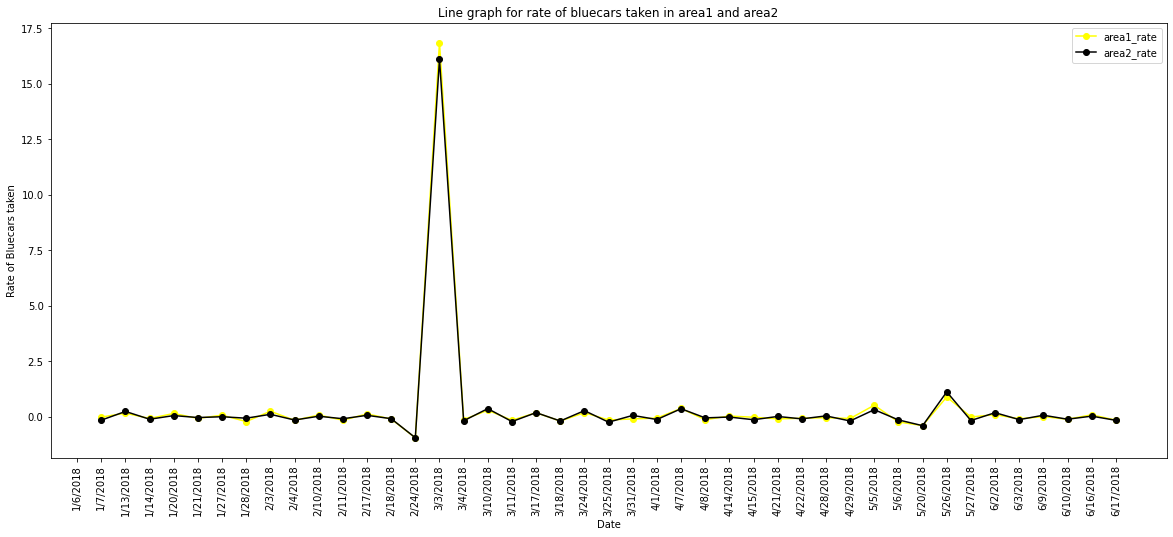

In [ ]:
# Ploting a line graph showng the rate of bluecars taken in area1 and area2
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
rate1 = area1_rate['bluecars_taken_sum']
rate2 = area2_rate['bluecars_taken_sum']
plt.plot(date1, rate1, color='yellow', marker = 'o', label = 'area1_rate')
plt.plot(date2, rate2, color='black', marker = 'o', label = 'area2_rate')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Rate of Bluecars taken')
plt.title('Line graph for rate of bluecars taken in area1 and area2')
plt.show()

**Observations**
> The output shows that the rate of change of the number of bluecars taken on weekends in the two areas is the same.

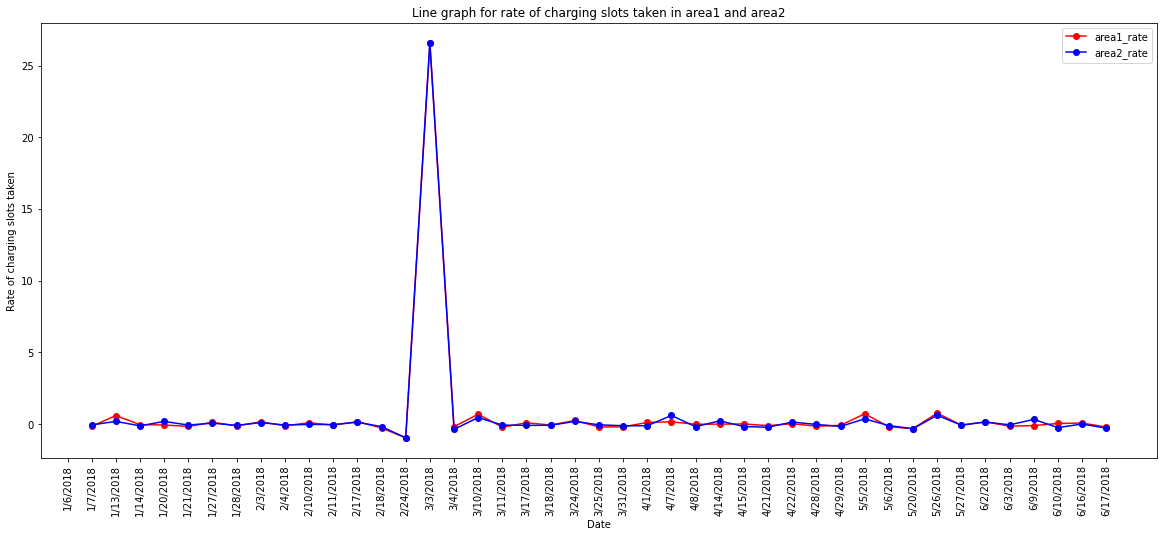

In [ ]:
# Ploting a line graph showng the rate of charging slots taken in area1 and area2
#
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
rate1 = area1_rate['slots_taken_sum']
rate2 = area2_rate['slots_taken_sum']
plt.plot(date1, rate1, color='r', marker = 'o', label = 'area1_rate')
plt.plot(date2, rate2, color='b', marker = 'o', label = 'area2_rate')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Rate of charging slots taken')
plt.title('Line graph for rate of charging slots taken in area1 and area2')
plt.show()

**Observations**
> The rate of change of the number of charging slots taken on the weekends in the two areas is the same.

#### Bar Graphs

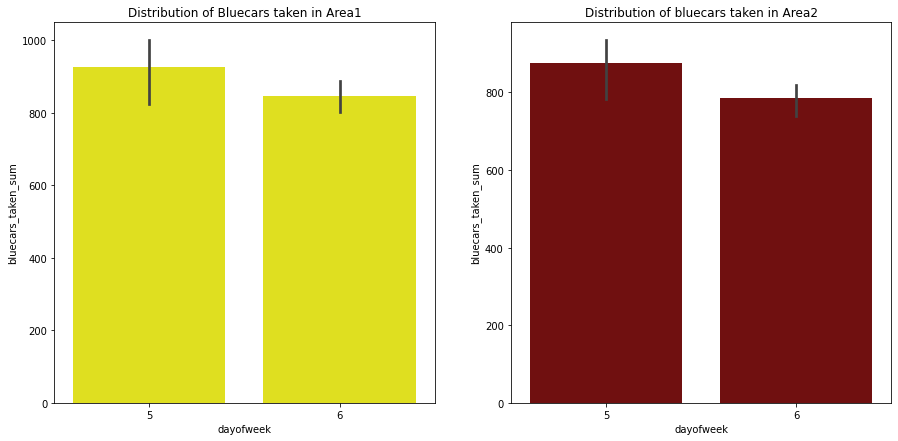

In [ ]:
# Ploting a bar graph to show which day of the weekend had more bluecars taken on average in the two areas
#
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(data= area1, x = 'dayofweek', y = 'bluecars_taken_sum', ax=ax[0], color='yellow')
ax[0].set_title('Distribution of Bluecars taken in Area1')
sns.barplot(data= area2, x = 'dayofweek', y = 'bluecars_taken_sum', ax=ax[1], color='maroon')
ax[1].set_title('Distribution of bluecars taken in Area2')
plt.show()

**Observation**
> The output shows the number of cars taken was more on Saturdays in both areas.

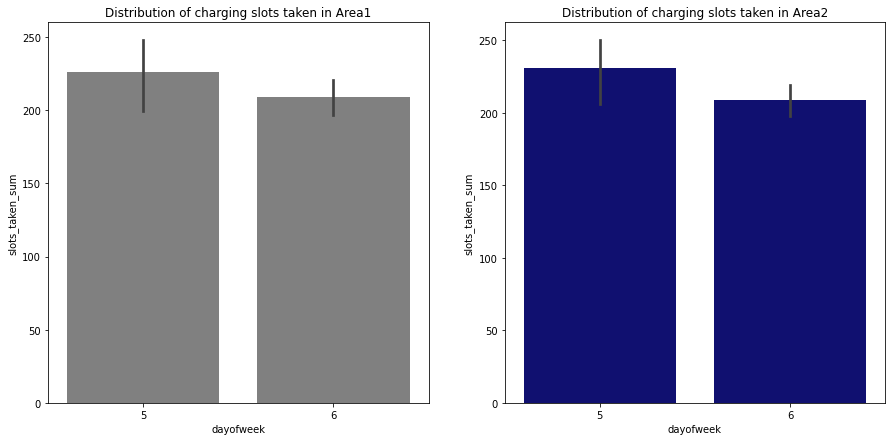

In [ ]:
# Ploting a bar graph to show which day of the weekend had more charging slots taken on average in the two areas
#
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(data= area1, x = 'dayofweek', y = 'slots_taken_sum', ax=ax[0], color='grey')
ax[0].set_title('Distribution of charging slots taken in Area1')
sns.barplot(data= area2, x = 'dayofweek', y = 'slots_taken_sum', ax=ax[1], color='navy')
ax[1].set_title('Distribution of charging slots taken in Area2')
plt.show()

**Observation**
> The output shows the number of charging plots taken was more on Saturdays in both areas.

#### Scatterplot

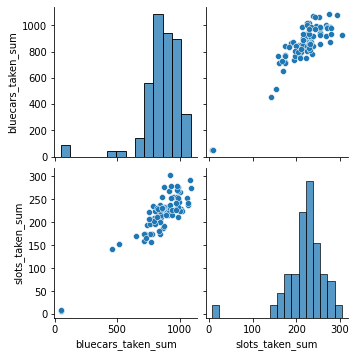

In [ ]:
# Showing the relationship between the two variables of interest in our dataset autolib_df2 using a pairplot
sns.pairplot(autolib_df1[['bluecars_taken_sum','slots_taken_sum']])
plt.show()

**Observations**
> From the above scatterplot, there seems to be a positive relationship between the bluecars taken and the charging slots taken i.e. as one increases the other also increases.

#### Correlation Coefficient

In [ ]:
# Determining the correlation coeffient between the bluecars taken and charging slots taken on weekends in the two areas
# We'll use the pearson coefficient
pearson_coeff = autolib_df1["slots_taken_sum"].corr(autolib_df1["bluecars_taken_sum"], method="pearson") 
print(pearson_coeff)

0.8848701126061262


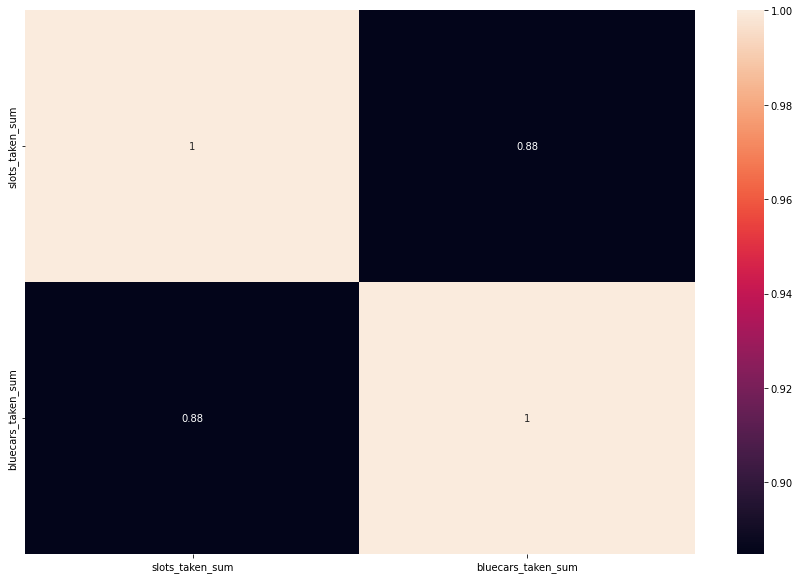

In [ ]:
# Visualizing the correlation using a heat map
plt.figure(figsize=(15,10))
sns.heatmap(autolib_df1[["slots_taken_sum", "bluecars_taken_sum"]].corr(), annot=True)

**Observations**
> From the output, the correlation coefficent of bluecars taken and charging slots taken on weekend is 0.88. This means that the two variables are strongly correlated.

## **7. Implementing the Solution**

### Hypothesis Testing

* We will use the z-test to test our hypothesis because we have the sample mean, assumed mean and standard deviation.

* Our significance level (alpha) is set at 0.05. This means that there is a 5% chance that we will reject the null hypothesis when it is true. (5 % chance of making a type 1 error )

### Statement of Hypothesis


> Now that we have understood our data, we need to find out if there is a correlation between the average number of blue cars taken and the average number of charging slots taken on weekends. 

> **Ho**: An increase in the average number of blue cars taken increases the average number of charging slots taken on weekends. 

> **Ha**: There is no correlation between the average number of bluecars taken and the average number of charging slots taken on weekends. (Claim)

### Loading the sample dataset

> We will use Simple Random Sampling technique to pick our desired sample size because we want each observation to have an equal chance of selection until the desired sample size is achieved.

In [ ]:
# Previewing our dataset
#
autolib_df1.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2345,75016,1/6/2018,5,weekend,847,868,199,206
2346,75016,1/7/2018,6,weekend,842,851,178,174
2352,75016,1/13/2018,5,weekend,985,973,278,278
2353,75016,1/14/2018,6,weekend,918,940,274,268
2359,75016,1/20/2018,5,weekend,1062,1077,249,252


In [ ]:
# Getting our sample using simple random sampling method
#
sample_df = autolib_df1.sample(n = 20, replace="False")
sample_df.head()


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2530,75017,2/4/2018,6,weekend,846,917,236,238
2597,75017,4/15/2018,6,weekend,816,898,221,232
2352,75016,1/13/2018,5,weekend,985,973,278,278
2590,75017,4/8/2018,6,weekend,936,975,224,228
2367,75016,1/28/2018,6,weekend,847,890,205,210


**Observations**
> The output shows a dataset with 20 randomly selected records from the weekend dataset of the two areas of interest.

### Calculating the test statistics

In [ ]:
# We will first get the summary of the population statistics
autolib_df1[['bluecars_taken_sum', 'slots_taken_sum']].describe()

,bluecars_taken_sum,slots_taken_sum
count,88.000000,88.000000
mean,858.670455,218.806818
std,167.781585,46.110776
min,49.000000,7.000000
25%,801.750000,204.500000
50%,870.000000,224.000000
75%,974.750000,242.750000
max,1088.000000,304.000000


In [ ]:
# We then proceed to get the sample mean of number of bluecar taken
bluecar_mean = sample_df['bluecars_taken_sum'].mean()
print('Sample mean of bluecar taken is :',bluecar_mean)

# then we get the sample mean of charging slots taken
slots_mean = sample_df['slots_taken_sum'].mean()
print('Sample mean of charging slots taken is :',slots_mean)

Sample mean of bluecar taken is : 861.85
Sample mean of charging slots taken is : 225.55


In [ ]:
# Since we have the sample mean, assumed mean and standard deviation, 
# we can now calculate the z statistics 
# z statistic = (sample mean-assumed mean)/std
#
# z statistic for bluecar taken
z_stat_bluecar = (bluecar_mean - 858 ) / 167
z_stat_bluecar
print('Test Statistic for Bluecar taken is :',z_stat_bluecar)

# z statistic for charging slots taken
z_stat_slots = (slots_mean - 218 ) / 46
z_stat_slots
print('Test Statistic for charging slots taken is :',z_stat_slots)

Test Statistic for Bluecar taken is : 0.023053892215569
Test Statistic for charging slots taken is : 0.16413043478260894


**Observations**
> Our z score is a negative figure for both the bluecars taken and charging slots taken. This indicates that the measurement is smaller than the mean that they are 0.198 and 0.136 standard deviations below the means respectively.

In [ ]:
# We then calculate the p-values
from scipy.stats import norm
from scipy import stats

# p-values for bluecars taken
p_value_bluecar = stats.norm.cdf(z_stat_bluecar)
print('P Value for bluecars taken is :',p_value_bluecar)

# p-values for charging slots taken
p_value_slots = stats.norm.cdf(z_stat_slots)
print('P Value for charging slots taken is :',p_value_slots)

P Value for bluecars taken is : 0.509196357709044
P Value for charging slots taken is : 0.5651857683996999


### Rejecting or Accepting Null Hypothesis

> We reject the null hypothesis when the p-value is equal to or less than the significance level (α; alpha).

In [ ]:
alpha =  0.05
if p_value_bluecar  < alpha:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


In [ ]:
alpha =  0.05
if p_value_slots  < alpha:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


## **8. Hypothesis Testing Interpretation**


> We fail to reject the null hypothesis that an increase in the average number of blue cars taken increases the average number of charging slots taken on weekends. This means that there is no sufficient evidence to prove that there is no correlation between the average number of bluecars taken and the average number of charging slots taken on weekends, based on the findings from the two areas of interest.
